# Case Study on Probability for Data Science
Problem Statement: 
Make a suitable machine learning algorithm to predict if the mushroom is edible or poisonous (e or p) using the given dataset.
(Along with other ML algorithms, Naïve Bayes’ Classifier should be applied)
Also, if some data pre-processing is necessary do that as well.

In [76]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#importing sklearn libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB

In [77]:
#loading dataset to python environment
pd.set_option('display.max_columns', 23)
df = pd.read_csv('mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [78]:
df.shape    #dataset with 8124 entries with 23 columns

(8124, 23)

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [80]:
#checking null values
df.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

There are no null values in the given dataset.

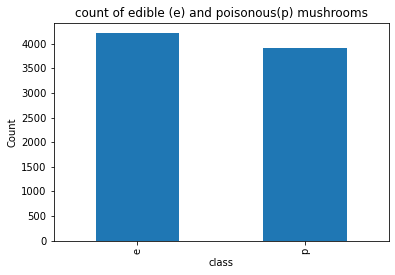

In [83]:
df['class'].value_counts().plot(kind = 'bar')
plt.ylabel("Count")
plt.xlabel("class")
plt.title("count of edible (e) and poisonous(p) mushrooms")
plt.show()

In [84]:
df.describe()  #Extracting statistical data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,t,b,s,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,3776,5176,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [86]:
df.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

Since our dataset contains only categorical variables we have to convert it into numerical for creating model. For that encoding is used. 

#### Label Encoding

In [87]:
#label encoding target column 'class'
le = LabelEncoder()
df['class'] = le.fit_transform(df['class'])
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,0,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,0,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,1,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,0,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


#### Splitting data into target set and feature set

In [88]:
# x is feature set and y is target(ie,'class')
x = df.drop(['class'],axis=1)
y = df['class']              

#### OneHot Encoding

In [89]:
#one hot encoding feature set x
x=pd.get_dummies(x)
x.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_b,...,population_n,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0,0


#### Splitting data into train and test data

In [90]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)

In [91]:
y_test.shape

(2438,)

In [92]:
x_test.shape

(2438, 117)

In [93]:
y_train.shape

(5686,)

In [94]:
x_train.shape

(5686, 117)

In [95]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

## Model1:  K- Nearest Neighbors (K-NN)

In [98]:
acc_values = []
neighbors = np.arange(3,15)
for k in neighbors:
    Classifier = KNeighborsClassifier(n_neighbors=k, metric='minkowski')
    Classifier.fit(x_train, y_train)
    y_pred = Classifier.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    acc_values.append(acc)

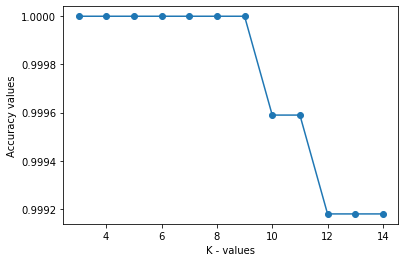

In [99]:
plt.plot(neighbors, acc_values, 'o-')
plt.xlabel('K - values')
plt.ylabel('Accuracy values')
plt.show() 

In [100]:
#### Remarks: Accuracy is high for K values: 3,4,5,6,7,8,9. we can use any of them to make model.

In [101]:
# taking K=3
Classifier = KNeighborsClassifier(n_neighbors=3, metric='minkowski')
Classifier.fit(x_train, y_train)
y_pred = Classifier.predict(x_test)

In [102]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1257
           1       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



In [103]:
confusion_matrix(y_test,y_pred)

array([[1257,    0],
       [   0, 1181]], dtype=int64)

#### Remarks: KNN model have accuracy score of 1.00 and there are no misclassifiers in this model.

## Model 2:  support vector machine (SVM)

In [104]:
#linear svm 
svm_linear = SVC(kernel ='linear')
svm_linear.fit(x_train, y_train)
y_pred = svm_linear.predict(x_test)


In [108]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1257
           1       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



In [109]:
confusion_matrix(y_test,y_pred)

array([[1257,    0],
       [   0, 1181]], dtype=int64)

#### Remarks: SVM linear model has accuracy score 1.0 and without any misclassifiers.

## Model 3: Random forest classifier

In [110]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

In [111]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1257
           1       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



In [112]:
confusion_matrix(y_test,y_pred)

array([[1257,    0],
       [   0, 1181]], dtype=int64)

#### Remarks: Random Forest classifier has accuracy score 1.0 without any misclassifiers.

## Model 4: Naive Bayes classifier

### a) gaussian Naive Bayes

In [113]:
classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB()

In [115]:
#prediction of the test set result
y_pred = classifier.predict(x_test)
y_pred

array([0, 1, 1, ..., 1, 0, 0])

In [120]:
# making confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1171   86]
 [   1 1180]]


In [118]:
accuracy_score(y_test, y_pred)

0.9643150123051681

In [117]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96      1257
           1       0.93      1.00      0.96      1181

    accuracy                           0.96      2438
   macro avg       0.97      0.97      0.96      2438
weighted avg       0.97      0.96      0.96      2438



#### Remarks: Gaussian naive bayes classifier has an accuracy score of 0.96 and there are misclassifications.

### b) Bernoulli Naive Bayes

In [121]:
classifier = BernoulliNB()
classifier.fit(x_train, y_train)

BernoulliNB()

In [122]:
# prediction of test set result

In [123]:
y_pred = classifier.predict(x_test)

In [124]:
accuracy_score(y_test, y_pred)

0.9343724364232978

In [126]:
#Making confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1241   16]
 [ 144 1037]]


In [127]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      1257
           1       0.98      0.88      0.93      1181

    accuracy                           0.93      2438
   macro avg       0.94      0.93      0.93      2438
weighted avg       0.94      0.93      0.93      2438



#### Remarks: Accuracy score for Bernoulli Naive Bayes classifier is 0.93 with lots of misclassifiers.

### c) multinomial naive bayes

In [128]:
classifier = MultinomialNB()
classifier.fit(x_train, y_train)

MultinomialNB()

In [129]:
y_pred = classifier.predict(x_test)

In [130]:
accuracy_score(y_test, y_pred)

0.9458572600492207

In [131]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[1252,    5],
       [ 127, 1054]], dtype=int64)

In [132]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      1257
           1       1.00      0.89      0.94      1181

    accuracy                           0.95      2438
   macro avg       0.95      0.94      0.95      2438
weighted avg       0.95      0.95      0.95      2438



#### Remarks: Accuracy score for multinomial naive bayes is 0.95 and there are many misclassifiers.

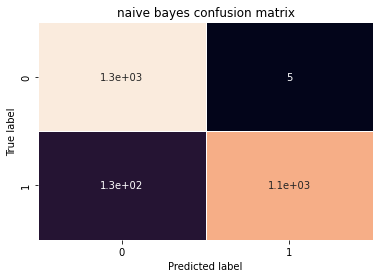

In [133]:
sns.heatmap(cm, annot = True,  linewidths=.5, cbar =None)
plt.title('naive bayes confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label');

#### ROC Curve

In [135]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.9442431444031965

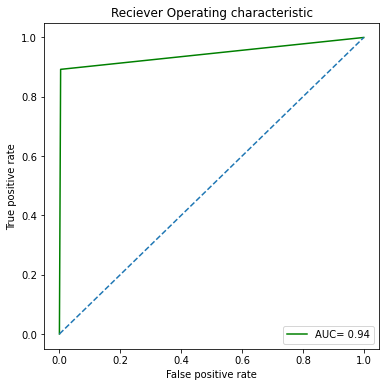

In [136]:
plt.figure(figsize=(6,6))
plt.title('Reciever Operating characteristic')
plt.plot(false_positive_rate, true_positive_rate, color='green', label= 'AUC= %0.2f' % roc_auc)
plt.legend(loc="lower right")
plt.plot([0,1],[0,1], linestyle="dashed")
plt.axis('tight')
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.show()